# **Project Code - Profili LinkedIn  |  [Matteo Musella]**

## 03 - ANALISI DEI DATI

### 3.1 - General

As always, you start by importing all the libraries your code needs.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import warnings

from scipy import stats

warnings.filterwarnings("ignore") 
plt.style.use('ggplot')

The dataset is loaded, which contains information relating to LinkedIn profiles.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_LinkedIn = "/content/drive/MyDrive/LinkedIn_profile.csv"
df_LinkedIn = pd.read_csv(df_LinkedIn)

The `.info()` method applied to our Data Frames returns a series of information, including:

- the number of lines
- the number of columns
- the data type for each column
- the number of non-zero rows for each column

In [4]:
df_LinkedIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62706 entries, 0 to 62705
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   c_id                           62706 non-null  object 
 1   avg_time_in_previous_position  62706 non-null  float64
 2   avg_current_position_length    62706 non-null  float64
 3   avg_previous_position_length   62706 non-null  float64
 4   m_urn                          62706 non-null  object 
 5   m_urn_id                       62706 non-null  int64  
 6   no_of_promotions               62706 non-null  int64  
 7   no_of_previous_positions       62706 non-null  int64  
 8   current_position_length        62706 non-null  int64  
 9   age                            62706 non-null  int64  
 10  beauty                         62706 non-null  float64
 11  beauty_female                  62706 non-null  float64
 12  beauty_male                    62706 non-null 

Using the `.head()` method, let's look at the first few rows of the DataFrame:

In [5]:
df_LinkedIn.head(5)

,c_id,avg_time_in_previous_position,avg_current_position_length,avg_previous_position_length,m_urn,m_urn_id,no_of_promotions,no_of_previous_positions,current_position_length,age,...,east_asian,european,greek,hispanic,jewish,muslim,nordic,south_asian,n_followers,face_quality
0,1,2.000000,457.0,1338.0,urn:li:member:149435456,3008,1,1,457,37,...,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
1,2,1.500000,212.0,897.5,urn:li:member:149435456,3008,1,2,212,37,...,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
2,3,1.333333,243.0,669.0,urn:li:member:149435456,3008,1,3,243,37,...,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
3,4,1.250000,123.0,562.5,urn:li:member:149435456,3008,1,4,123,37,...,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
4,5,1.200000,244.0,474.6,urn:li:member:149435456,3008,1,5,244,37,...,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662


### 3.2 - Data Cleaning

In [6]:
for i, el in enumerate(df_LinkedIn['c_id']): 
    try:
        df_LinkedIn['c_id'][i] = int(el)
    except:
        df_LinkedIn['c_id'][i] = i+1
df_LinkedIn['c_id'] = df_LinkedIn['c_id'].astype('int64')

Convert the feature gender from string to binary, using the `.replace()` method:

In [7]:
df_LinkedIn['gender'] = df_LinkedIn['gender'].replace('Male', 1)
df_LinkedIn['gender'] = df_LinkedIn['gender'].replace('Female', 0)

In [8]:
df_LinkedIn_clean = df_LinkedIn[['c_id', 'avg_time_in_previous_position', 'avg_current_position_length', 'avg_previous_position_length', 'm_urn_id', 'no_of_promotions', 'no_of_previous_positions', 
                                 'current_position_length', 'age', 'beauty', 'beauty_female','beauty_male', 'blur', 'emo_anger', 'emp_disgust', 'emo_fear', 'emo_happiness', 'emo_neutral', 'emo_sadness', 
                                 'emo_surprise', 'gender', 'head_pitch', 'head_roll', 'head_yaw', 'mouth_close', 'mouth_mask', 'mouth_open', 'mouth_other', 'skin_acne', 'skin_dark_circle', 'skin_health', 
                                 'skin_stain', 'smile', 'african', 'celtic_english', 'east_asian', 'european', 'greek', 'hispanic', 'jewish', 'muslim', 'nordic', 'south_asian', 'n_followers', 'face_quality']]

In [9]:
df_LinkedIn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62706 entries, 0 to 62705
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   c_id                           62706 non-null  int64  
 1   avg_time_in_previous_position  62706 non-null  float64
 2   avg_current_position_length    62706 non-null  float64
 3   avg_previous_position_length   62706 non-null  float64
 4   m_urn_id                       62706 non-null  int64  
 5   no_of_promotions               62706 non-null  int64  
 6   no_of_previous_positions       62706 non-null  int64  
 7   current_position_length        62706 non-null  int64  
 8   age                            62706 non-null  int64  
 9   beauty                         62706 non-null  float64
 10  beauty_female                  62706 non-null  float64
 11  beauty_male                    62706 non-null  float64
 12  blur                           62706 non-null 

The `.describe()` function does exactly that: it provides purely descriptive information about the dataset. This information includes statistics summarizing the central tendency of the variable, their dispersion, the presence of empty values, and their shape.

In [10]:
df_LinkedIn_clean.describe()

,c_id,avg_time_in_previous_position,avg_current_position_length,avg_previous_position_length,m_urn_id,no_of_promotions,no_of_previous_positions,current_position_length,age,beauty,...,east_asian,european,greek,hispanic,jewish,muslim,nordic,south_asian,n_followers,face_quality
count,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000,...,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000,62706.000000
mean,31353.500000,1.194328,765.634128,1100.743329,7637.790786,1.243517,3.498724,962.714206,44.047906,57.375472,...,8.801858,15.579000,0.502701,11.309321,0.372354,4.786998,2.366192,14.173644,1225.822282,65.397677
std,18101.807327,0.506724,750.709169,985.750323,4384.632588,0.756857,3.112997,1088.318067,10.683454,11.761821,...,22.693184,27.701718,5.965157,25.082939,5.010766,18.583664,13.235915,33.318162,6406.676749,33.960414
min,1.000000,1.000000,-120.000000,0.000000,1.000000,1.000000,1.000000,-120.000000,1.000000,18.402000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006000
25%,15677.250000,1.000000,274.000000,537.000000,3818.250000,1.000000,2.000000,304.000000,37.000000,49.038000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,405.000000,47.020250
50%,31353.500000,1.000000,578.000000,882.800000,7677.500000,1.000000,3.000000,640.000000,44.000000,56.899500,...,0.000000,1.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,725.000000,83.475000
75%,47029.750000,1.200000,1035.000000,1399.787500,11391.000000,1.000000,4.000000,1217.000000,51.000000,65.545250,...,3.030000,14.970000,0.000000,6.917500,0.000000,0.000000,0.000000,1.140000,1244.000000,90.777750
max,62706.000000,15.000000,21884.000000,39781.000000,15257.000000,12.000000,49.000000,21884.000000,80.000000,92.431000,...,100.000000,99.990000,99.980000,100.000000,99.930000,99.850000,100.000000,99.990000,530566.000000,94.864000


You can check through the `.isnull().sum()` method if there are null values ​​inside the dataFrame:

In [11]:
df_LinkedIn_clean.isnull().sum()

c_id                             0
avg_time_in_previous_position    0
avg_current_position_length      0
avg_previous_position_length     0
m_urn_id                         0
no_of_promotions                 0
no_of_previous_positions         0
current_position_length          0
age                              0
beauty                           0
beauty_female                    0
beauty_male                      0
blur                             0
emo_anger                        0
emp_disgust                      0
emo_fear                         0
emo_happiness                    0
emo_neutral                      0
emo_sadness                      0
emo_surprise                     0
gender                           0
head_pitch                       0
head_roll                        0
head_yaw                         0
mouth_close                      0
mouth_mask                       0
mouth_open                       0
mouth_other                      0
skin_acne           

### 3.3 - Data Exploration

#### Outliers

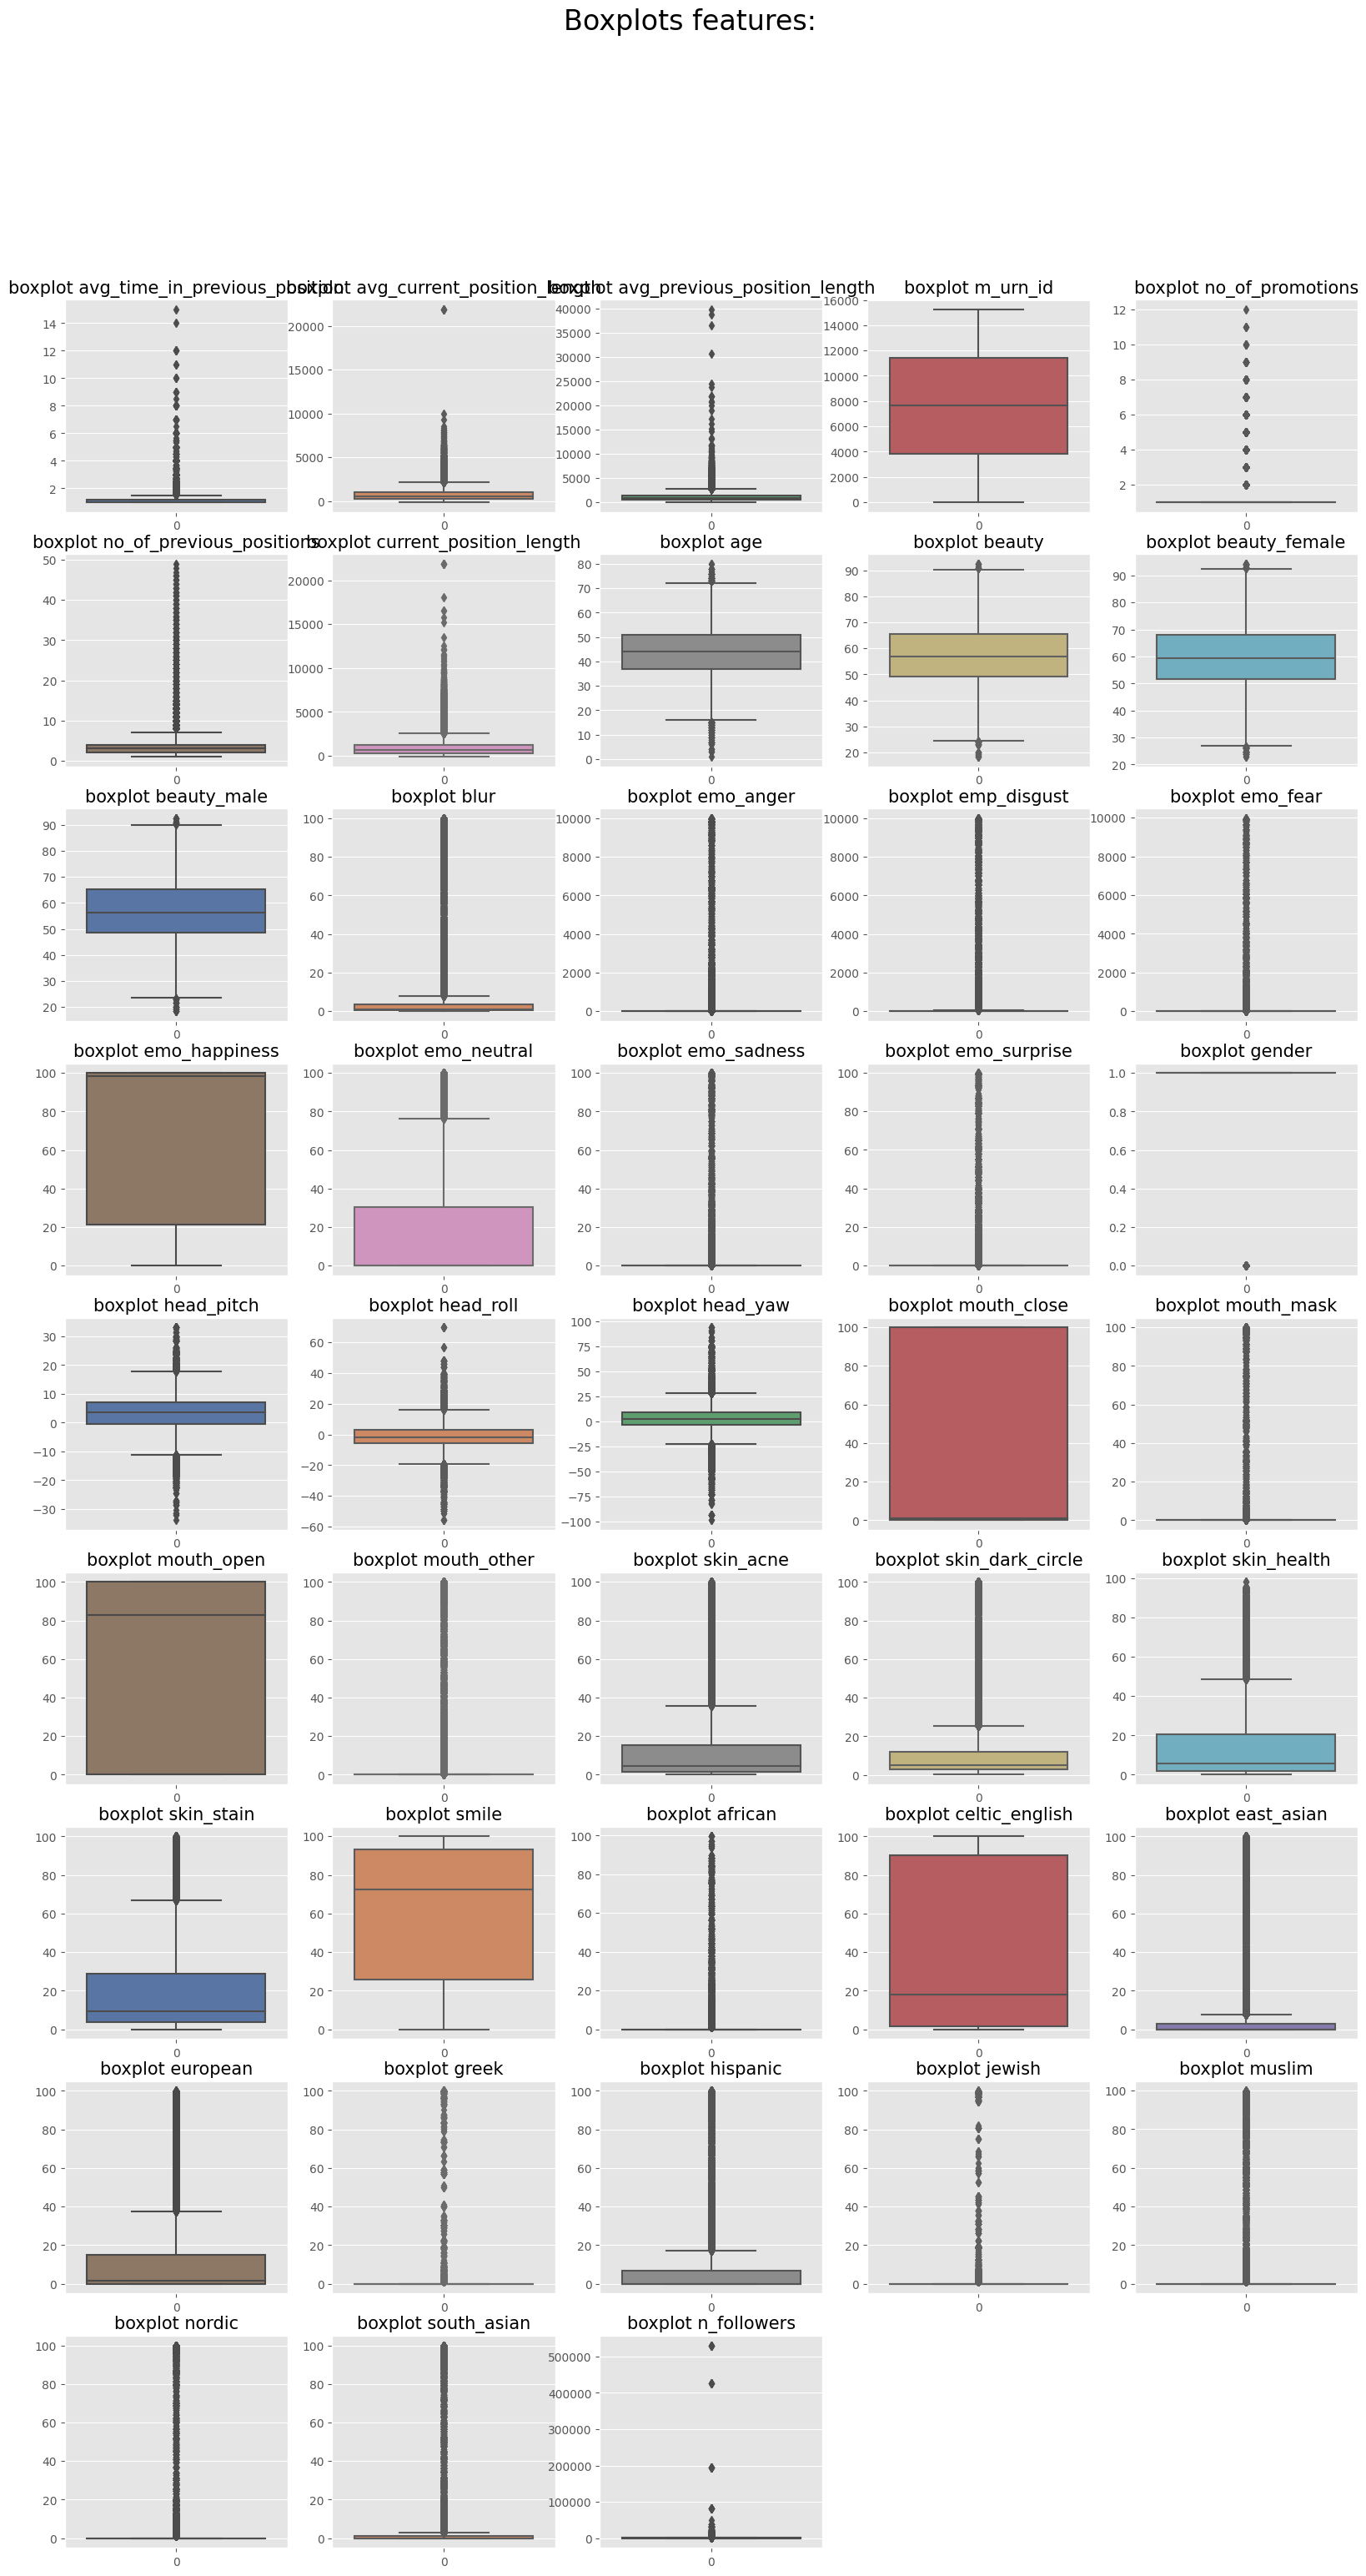

In [12]:
plt.subplots(figsize=(20,35))
c_ = sns.color_palette("deep", n_colors = 45)
i = 1

for col in df_LinkedIn_clean.columns[1:-1]:
    plt.subplot(9,5,i)
    sns.boxplot(data = df_LinkedIn_clean[col],color=c_[i-1])
    plt.title('boxplot '+ col, fontsize=15)
    i+=1

plt.suptitle("Boxplots features:",fontsize=24)
plt.show()

#### Heatmap

As a first step, we start with the correlation between the target attribute (n_followers) and some features, representing it through 'heatmap' graphs:

In [13]:
df_corr_hs = df_LinkedIn_clean.iloc[:,:]
mat_hs = df_corr_hs.corr()
mat_hs_p = mat_hs[mat_hs.index=='n_followers'] 
mat_hs_p

,c_id,avg_time_in_previous_position,avg_current_position_length,avg_previous_position_length,m_urn_id,no_of_promotions,no_of_previous_positions,current_position_length,age,beauty,...,east_asian,european,greek,hispanic,jewish,muslim,nordic,south_asian,n_followers,face_quality
n_followers,0.020338,-0.005338,0.017014,0.009454,0.019669,-0.002798,0.027474,0.010616,0.017029,-0.001766,...,0.000666,-0.007427,-0.004288,-0.005031,0.001657,0.009064,-0.010812,0.017137,1.0,0.008548


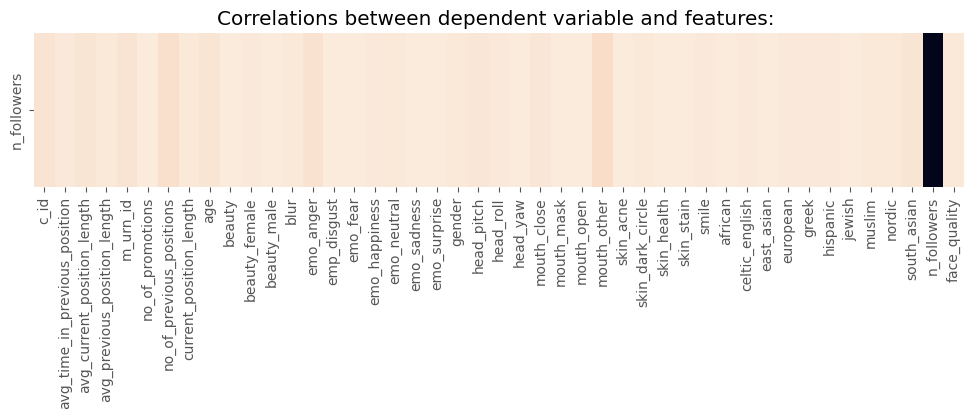

In [14]:
f, ax = plt.subplots(figsize=(12,2)) 
sns.heatmap(abs(mat_hs_p),
            ax = ax,
            cmap = sns.cm.rocket_r, 
            cbar=False
            )

ax.set_title('Correlations between dependent variable and features: ') 
plt.show()

Then we calculated the correlation matrix between all the features and showed them in the heatmap:

In [15]:
df_corr = df_LinkedIn_clean.iloc[:-1,:-1] 
mat = df_corr.corr()
mat

,c_id,avg_time_in_previous_position,avg_current_position_length,avg_previous_position_length,m_urn_id,no_of_promotions,no_of_previous_positions,current_position_length,age,beauty,...,celtic_english,east_asian,european,greek,hispanic,jewish,muslim,nordic,south_asian,n_followers
c_id,1.000000,-0.001257,0.010797,-0.003919,0.692419,0.004927,-0.002354,0.009434,-0.003121,-0.016537,...,0.002722,0.019252,-0.029367,0.008192,0.004496,0.009763,0.017726,0.013407,-0.015698,0.020343
avg_time_in_previous_position,-0.001257,1.000000,-0.051859,0.416505,-0.006169,0.012136,-0.049366,-0.039971,0.038515,-0.025814,...,0.031994,-0.002799,-0.000629,0.007766,-0.001537,-0.007836,-0.014504,0.056782,-0.050940,-0.005339
avg_current_position_length,0.010797,-0.051859,1.000000,0.227636,0.014000,0.018717,-0.146712,0.772545,0.150740,-0.112040,...,0.066162,-0.027290,-0.000217,-0.006254,-0.012172,0.014956,-0.044235,0.004921,-0.032847,0.017013
avg_previous_position_length,-0.003919,0.416505,0.227636,1.000000,-0.001398,0.008677,-0.142188,0.181578,0.216015,-0.148178,...,0.136876,-0.041435,-0.003074,0.002557,-0.009033,0.011273,-0.069943,0.025471,-0.109115,0.009454
m_urn_id,0.692419,-0.006169,0.014000,-0.001398,1.000000,-0.003411,0.001105,0.006155,0.000475,-0.023649,...,0.007444,0.006515,-0.027203,0.003584,-0.005251,0.004230,0.011285,0.004931,0.000315,0.019673
no_of_promotions,0.004927,0.012136,0.018717,0.008677,-0.003411,1.000000,-0.062898,0.572620,0.033185,-0.017116,...,0.016846,-0.005491,0.013427,-0.005466,-0.002807,-0.000066,-0.015730,0.030022,-0.027405,-0.002799
no_of_previous_positions,-0.002354,-0.049366,-0.146712,-0.142188,0.001105,-0.062898,1.000000,-0.151378,0.112442,-0.071149,...,0.103043,-0.059388,0.003669,-0.000768,0.016614,-0.008757,-0.033496,-0.004712,-0.085342,0.027479
current_position_length,0.009434,-0.039971,0.772545,0.181578,0.006155,0.572620,-0.151378,1.000000,0.143811,-0.101622,...,0.062558,-0.023834,0.007306,-0.008998,-0.010382,0.010799,-0.043839,0.018409,-0.042309,0.010615
age,-0.003121,0.038515,0.150740,0.216015,0.000475,0.033185,0.112442,0.143811,1.000000,-0.349158,...,0.313422,-0.278441,0.053124,0.008264,-0.026681,0.020623,-0.079577,0.054144,-0.206604,0.017033
beauty,-0.016537,-0.025814,-0.112040,-0.148178,-0.023649,-0.017116,-0.071149,-0.101622,-0.349158,1.000000,...,-0.124465,0.020834,0.076891,0.019752,0.022905,0.015995,0.080037,-0.011187,0.026126,-0.001769


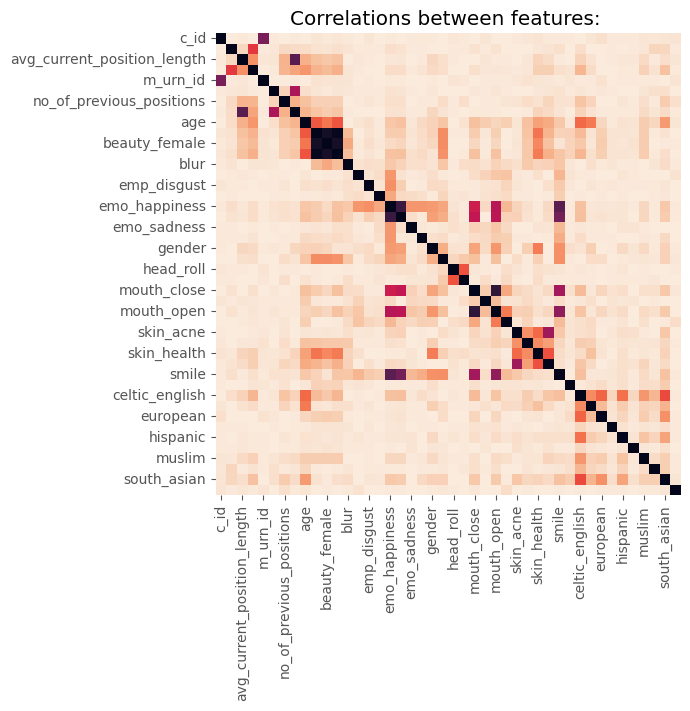

In [16]:
f, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(abs(mat),
            ax = ax,
            cmap = sns.cm.rocket_r,
            cbar=False
            )

ax.set_title('Correlations between features: ') 
plt.show()

#### Scatterplot

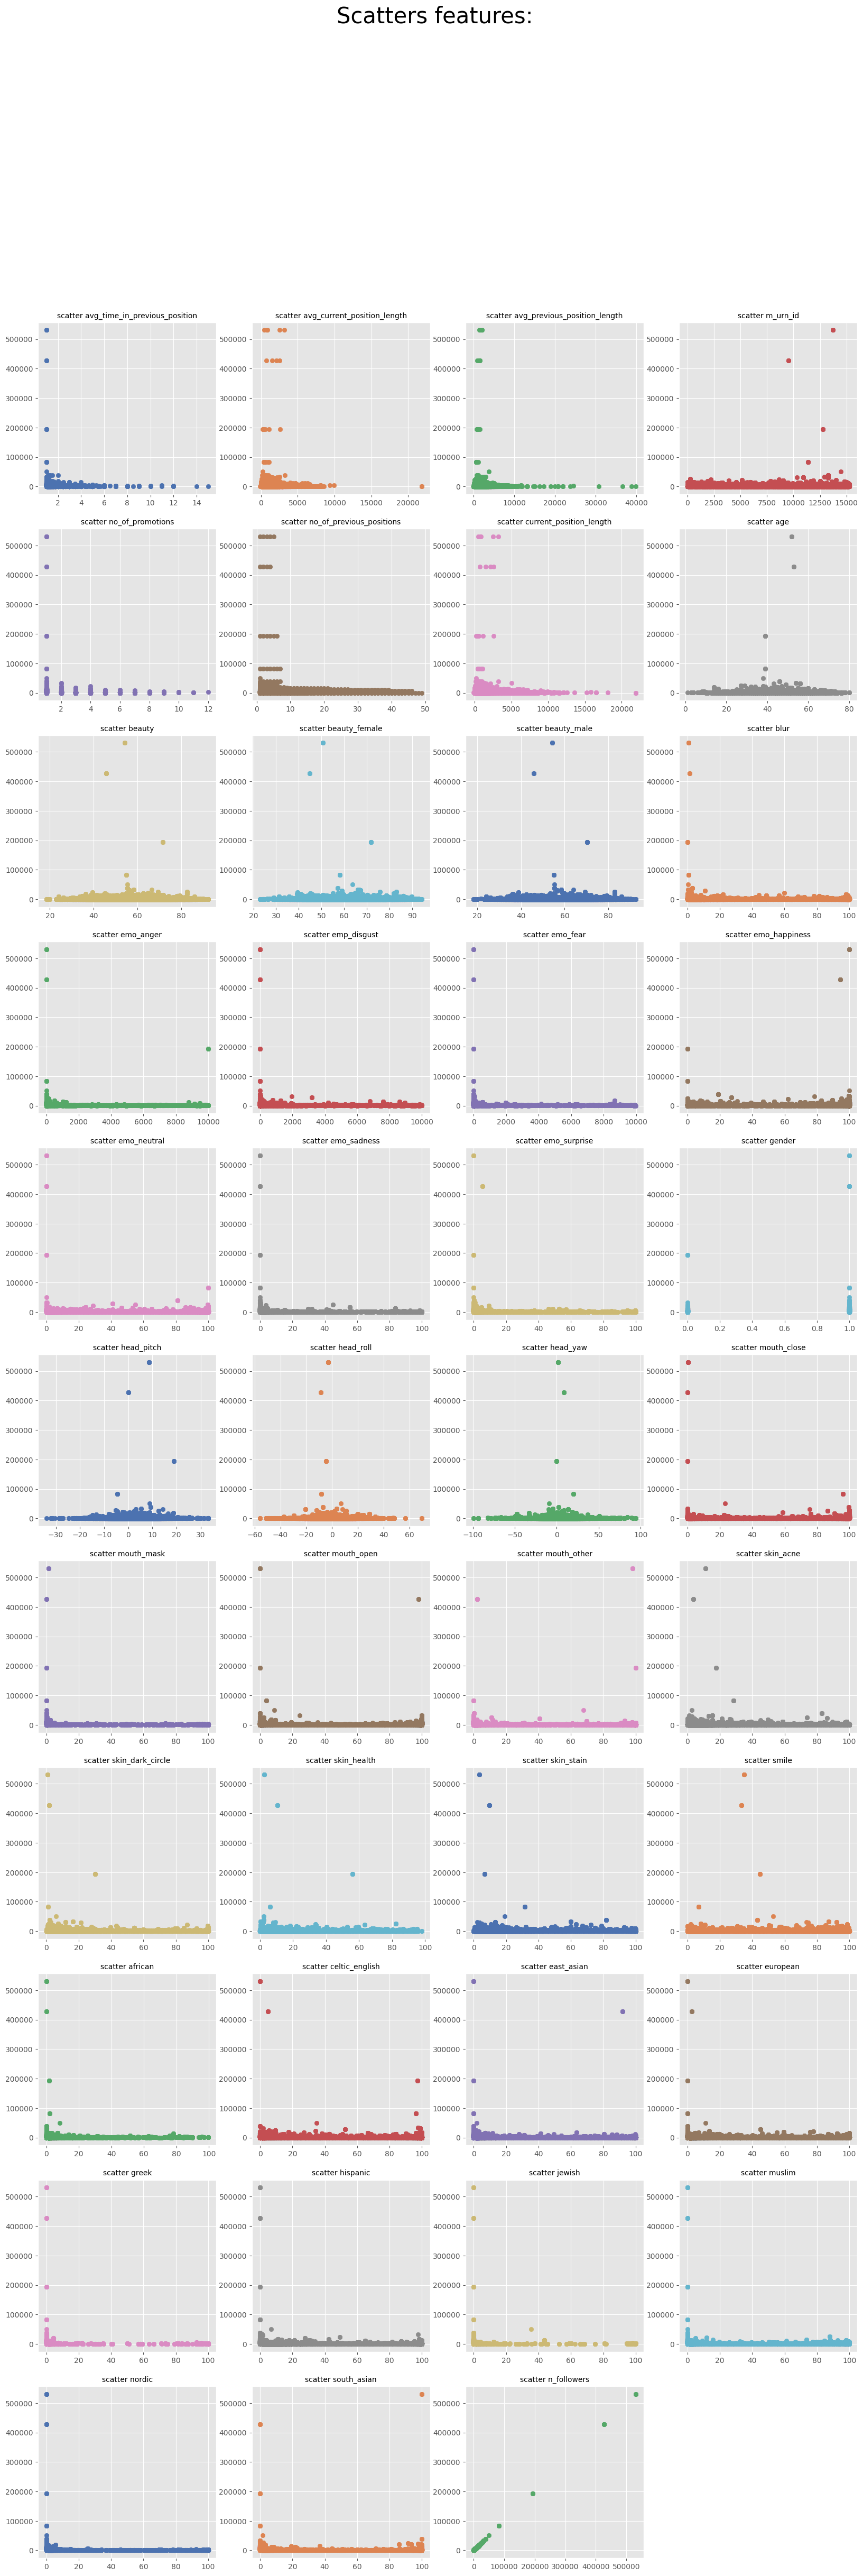

In [17]:
plt.subplots(figsize=(20,60))
c_ = sns.color_palette("deep", n_colors=45)
i = 1

for col in df_LinkedIn_clean.columns[1:-1]:
    plt.subplot(12,4,i)
    plt.scatter(df_LinkedIn_clean[col], df_LinkedIn_clean['n_followers'],color=c_[i-1])
    plt.title('scatter '+ col, fontsize=10)
    i+=1

plt.suptitle("Scatters features:",fontsize=30)
plt.show()

## 04 - REGRESSION

### General

You import the libraries needed for machine learning classification algorithm implementations.

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

The new DataFrame is formed by eliminating the features that could have caused redundancy:

In [19]:
df_LinkedIn_profile = df_LinkedIn_clean [['c_id', 'avg_time_in_previous_position', 'avg_current_position_length', 'avg_previous_position_length', 'no_of_promotions', 'no_of_previous_positions', 
                                          'current_position_length', 'age', 'beauty', 'beauty_female','beauty_male', 'blur', 'emo_anger', 'emp_disgust', 'emo_fear', 'emo_neutral', 'emo_surprise', 
                                          'gender', 'head_pitch', 'head_roll', 'head_yaw', 'mouth_close', 'mouth_mask', 'mouth_open', 'mouth_other', 'skin_acne', 'skin_dark_circle', 'skin_health', 
                                          'skin_stain', 'smile', 'african', 'celtic_english', 'east_asian', 'european', 'greek', 'hispanic', 'jewish', 'muslim', 'nordic', 'south_asian', 'n_followers', 'face_quality']]

### ------------------

### Employment_Data [1st case]

#### General

The first set of attributes is related to employment data:

In [20]:
X_1 = df_LinkedIn_profile[['c_id', 'avg_time_in_previous_position', 'avg_current_position_length', 'avg_previous_position_length', 'no_of_promotions', 'no_of_previous_positions', 'current_position_length', 'age']].to_numpy()
y_1 = df_LinkedIn_profile['n_followers'].to_numpy()

We normalize the data with the min max scaler function

In [21]:
scaler = MinMaxScaler()
scaler.fit(X_1)
X_1 = scaler.transform(X_1)

In [22]:
X_1

array([[0.00000000e+00, 7.14285714e-02, 2.62225050e-02, ...,
        0.00000000e+00, 2.62225050e-02, 4.55696203e-01],
       [1.59476916e-05, 3.57142857e-02, 1.50881658e-02, ...,
        2.08333333e-02, 1.50881658e-02, 4.55696203e-01],
       [3.18953831e-05, 2.38095238e-02, 1.64970005e-02, ...,
        4.16666667e-02, 1.64970005e-02, 4.55696203e-01],
       ...,
       [9.99968105e-01, 0.00000000e+00, 1.10434466e-02, ...,
        1.25000000e-01, 1.10434466e-02, 7.46835443e-01],
       [9.99984052e-01, 0.00000000e+00, 1.03662970e-01, ...,
        1.45833333e-01, 1.03662970e-01, 7.46835443e-01],
       [1.00000000e+00, 0.00000000e+00, 3.32212325e-02, ...,
        1.66666667e-01, 3.32212325e-02, 7.46835443e-01]])

In [23]:
y_1

array([420, 420, 420, ..., 279, 279, 279])

In [24]:
print('shape of X_1:') 
print(X_1.shape) 
print('type of X_1:') 
print(type(X_1)) 
print('shape of y_1:') 
print(y_1.shape) 
print('type of y_1:') 
print(type(y_1))

shape of X_1:
(62706, 8)
type of X_1:
<class 'numpy.ndarray'>
shape of y_1:
(62706,)
type of y_1:
<class 'numpy.ndarray'>


We test the train_test_split function in order to check if the set created are the same in each iteration:

In [25]:
X_trainval_1, X_test_1, y_trainval_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.1, random_state=0, shuffle=True)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_trainval_1, y_trainval_1, test_size=0.3, random_state=0, shuffle=True)

In [26]:
print(len(X_train_1))
print(len(X_test_1))
print(len(X_val_1))

39504
6271
16931


In [27]:
X_train_1

array([[0.64399968, 0.01428571, 0.00822578, ..., 0.08333333, 0.00822578,
        0.49367089],
       [0.09327805, 0.        , 0.06080713, ..., 0.04166667, 0.06080713,
        0.59493671],
       [0.01840364, 0.        , 0.07044174, ..., 0.125     , 0.07044174,
        0.6835443 ],
       ...,
       [0.55056216, 0.        , 0.07044174, ..., 0.02083333, 0.07044174,
        0.49367089],
       [0.75006778, 0.        , 0.04331031, ..., 0.02083333, 0.19473732,
        0.64556962],
       [0.89275177, 0.07142857, 0.03722051, ..., 0.        , 0.03722051,
        0.26582278]])

In [28]:
X_test_1

array([[0.82754166, 0.03571429, 0.23513907, ..., 0.02083333, 0.23513907,
        0.59493671],
       [0.84385615, 0.        , 0.03632673, ..., 0.04166667, 0.09807308,
        0.74683544],
       [0.90453712, 0.        , 0.11338847, ..., 0.04166667, 0.11338847,
        0.59493671],
       ...,
       [0.05819313, 0.        , 0.00686239, ..., 0.02083333, 0.00686239,
        0.26582278],
       [0.6687186 , 0.        , 0.08155335, ..., 0.04166667, 0.15765315,
        0.44303797],
       [0.50474444, 0.01785714, 0.02758589, ..., 0.0625    , 0.02758589,
        0.64556962]])

In [29]:
X_val_1

array([[0.74558648, 0.03571429, 0.02613161, ..., 0.0625    , 0.02613161,
        0.35443038],
       [0.50007176, 0.        , 0.05385384, ..., 0.        , 0.05385384,
        0.40506329],
       [0.19649151, 0.        , 0.08843847, ..., 0.02083333, 0.08843847,
        0.65822785],
       ...,
       [0.94394386, 0.        , 0.01508817, ..., 0.04166667, 0.01508817,
        0.65822785],
       [0.74911092, 0.07142857, 0.027495  , ..., 0.04166667, 0.027495  ,
        0.46835443],
       [0.01811658, 0.        , 0.0373114 , ..., 0.04166667, 0.0373114 ,
        0.48101266]])

#### Liner Regression

In [30]:
for i in range (0,10):
  lir = LinearRegression()
  lir.fit(X_train_1, y_train_1)
  y_pred_1 = lir.predict(X_test_1)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_1, y_pred_1))
print(mean_squared_error(y_test_1, y_pred_1))
print(median_absolute_error(y_test_1, y_pred_1))

  --- METRICHE ---
906.6698816234795
9735401.10668005
634.9539407774275


<function matplotlib.pyplot.show(close=None, block=None)>

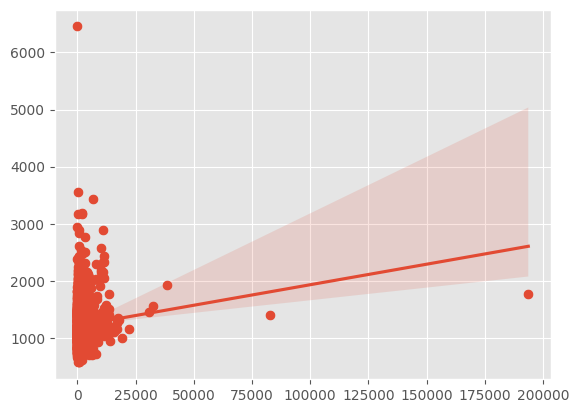

In [31]:
plt.scatter(y_test_1, y_pred_1)
sns.regplot(x=y_test_1, y=y_pred_1, data=df_LinkedIn_clean)
plt.show

#### Logistic Regression

In [32]:
lor = LogisticRegression()
lor.fit(X_train_1, y_train_1)
y_pred_1 = lor.predict(X_test_1)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_1, y_pred_1))
print(mean_squared_error(y_test_1, y_pred_1))
print(median_absolute_error(y_test_1, y_pred_1))

  --- METRICHE ---
1166.4831765268698
11158771.68489874
718.0


<function matplotlib.pyplot.show(close=None, block=None)>

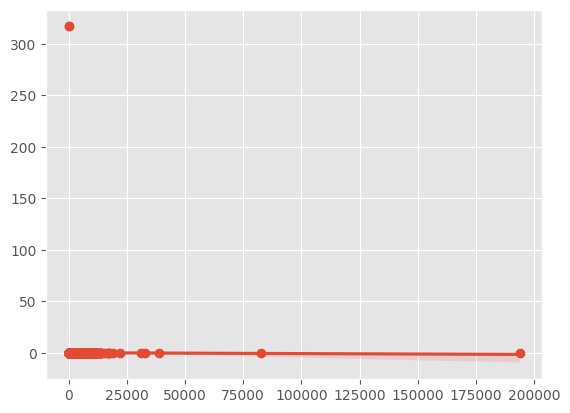

In [33]:
plt.scatter(y_test_1, y_pred_1)
sns.regplot(x=y_test_1, y=y_pred_1, data=df_LinkedIn_clean)
plt.show

#### KNeighbors Regressor

In [34]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 10)
  knn.fit(X_trainval_1, y_trainval_1)
  y_pred_1 = knn.predict(X_test_1)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_1, y_pred_1))
print(mean_squared_error(y_test_1, y_pred_1))
print(median_absolute_error(y_test_1, y_pred_1))

  --- METRICHE ---
952.7671503747409
14421327.036415242
498.9


<function matplotlib.pyplot.show(close=None, block=None)>

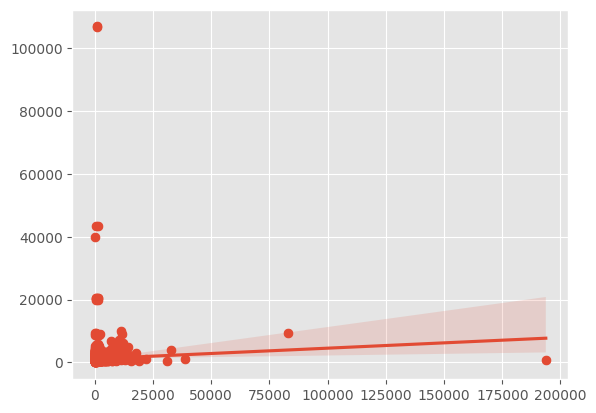

In [35]:
plt.scatter(y_test_1, y_pred_1)
sns.regplot(x=y_test_1, y=y_pred_1, data=df_LinkedIn_clean)
plt.show

In [36]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 5)
  knn.fit(X_trainval_1, y_trainval_1)
  y_pred_1 = knn.predict(X_test_1)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_1, y_pred_1))
print(mean_squared_error(y_test_1, y_pred_1))
print(median_absolute_error(y_test_1, y_pred_1))

  --- METRICHE ---
982.3101578695583
21072565.318813585
471.20000000000005


<function matplotlib.pyplot.show(close=None, block=None)>

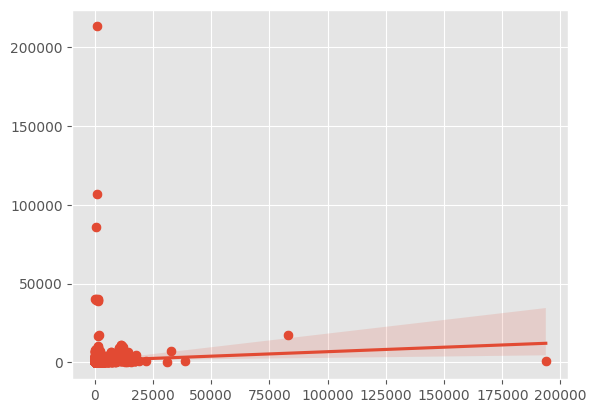

In [37]:
plt.scatter(y_test_1, y_pred_1)
sns.regplot(x=y_test_1, y=y_pred_1, data=df_LinkedIn_clean)
plt.show

In [38]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 1)
  knn.fit(X_trainval_1, y_trainval_1)
  y_pred_1 = knn.predict(X_test_1)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_1, y_pred_1))
print(mean_squared_error(y_test_1, y_pred_1))
print(median_absolute_error(y_test_1, y_pred_1))

  --- METRICHE ---
1134.5082124063147
68407219.51028544
456.0


<function matplotlib.pyplot.show(close=None, block=None)>

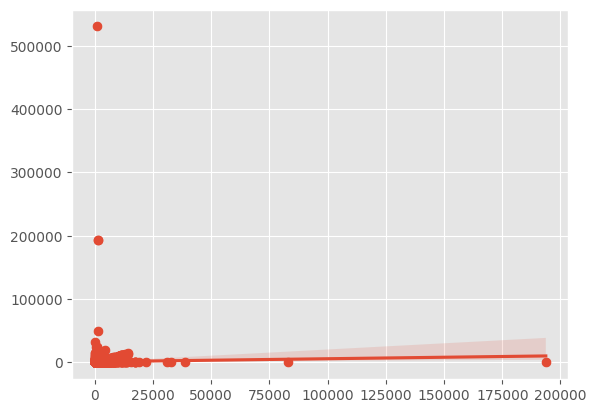

In [39]:
plt.scatter(y_test_1, y_pred_1)
sns.regplot(x=y_test_1, y=y_pred_1, data=df_LinkedIn_clean)
plt.show

#### Decision Tree

In [40]:
for i in range(0,10):
  dt = DecisionTreeRegressor()
  dt.fit(X_trainval_1, y_trainval_1)
  y_pred_1 = dt.predict(X_test_1)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_1, y_pred_1))
print(mean_squared_error(y_test_1, y_pred_1))
print(median_absolute_error(y_test_1, y_pred_1))

  --- METRICHE ---
846.6354648381439
48114779.163929194
318.0


<function matplotlib.pyplot.show(close=None, block=None)>

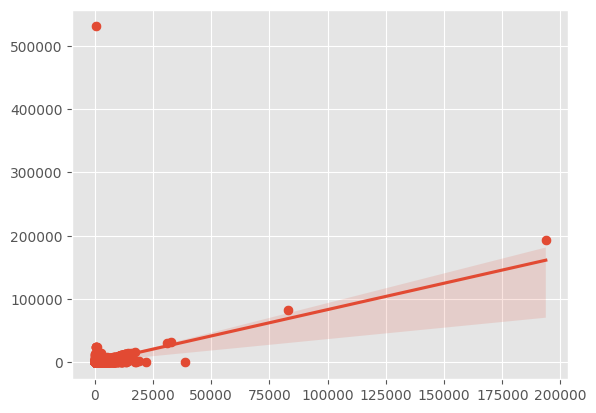

In [41]:
plt.scatter(y_test_1, y_pred_1)
sns.regplot(x=y_test_1, y=y_pred_1, data=df_LinkedIn_clean)
plt.show

#### Random Forest

In [42]:
for i in range(0,10):
  rf = RandomForestRegressor()
  rf.fit(X_trainval_1, y_trainval_1)
  y_pred_1 = rf.predict(X_test_1)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_1, y_pred_1))
print(mean_squared_error(y_test_1, y_pred_1))
print(median_absolute_error(y_test_1, y_pred_1))

  --- METRICHE ---
830.660510285441
6676461.391370275
504.81999999999994


<function matplotlib.pyplot.show(close=None, block=None)>

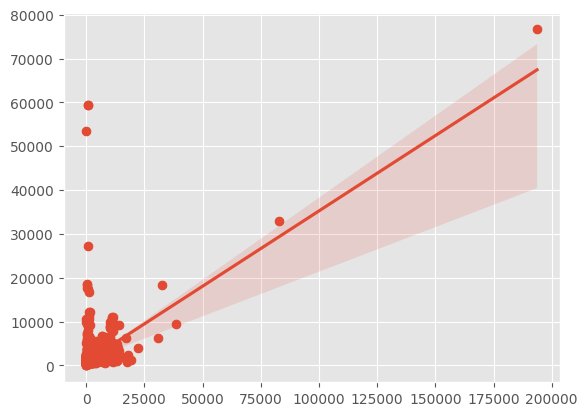

In [43]:
plt.scatter(y_test_1, y_pred_1)
sns.regplot(x=y_test_1, y=y_pred_1, data=df_LinkedIn_clean)
plt.show

### ------------------

### User_Data [2nd case]

#### General

The second set of attributes is that relating to general user data:

In [44]:
X_2 = df_LinkedIn_profile[['c_id', 'age', 'gender', 'african', 'celtic_english', 'east_asian', 'european', 'greek', 'hispanic', 'jewish', 'muslim', 'nordic', 'south_asian']].to_numpy()
y_2 = df_LinkedIn_profile['n_followers'].to_numpy()

We normalize the data with the min max scaler function

In [45]:
scaler = MinMaxScaler()
scaler.fit(X_2)
X_2 = scaler.transform(X_2)

In [46]:
X_2

array([[0.00000000e+00, 4.55696203e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.59476916e-05, 4.55696203e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.18953831e-05, 4.55696203e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99968105e-01, 7.46835443e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99984052e-01, 7.46835443e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 7.46835443e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [47]:
y_2

array([420, 420, 420, ..., 279, 279, 279])

In [48]:
print('shape of X_2:') 
print(X_2.shape) 
print('type of X_2:') 
print(type(X_2)) 
print('shape of y_2:') 
print(y_2.shape) 
print('type of y_2:') 
print(type(y_2))

shape of X_2:
(62706, 13)
type of X_2:
<class 'numpy.ndarray'>
shape of y_2:
(62706,)
type of y_2:
<class 'numpy.ndarray'>


We test the train_test_split function in order to check if the set created are the same in each iteration:

In [49]:
X_trainval_2, X_test_2, y_trainval_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.1, random_state=0, shuffle=True)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_trainval_2, y_trainval_2, test_size=0.3, random_state=0, shuffle=True)

In [50]:
print(len(X_train_2))
print(len(X_test_2))
print(len(X_val_2))

39504
6271
16931


In [51]:
X_train_2

array([[0.64399968, 0.49367089, 0.        , ..., 0.        , 0.        ,
        0.04160416],
       [0.09327805, 0.59493671, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01840364, 0.6835443 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.55056216, 0.49367089, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75006778, 0.64556962, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.89275177, 0.26582278, 1.        , ..., 0.01311968, 0.        ,
        0.        ]])

In [52]:
X_test_2

array([[0.82754166, 0.59493671, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.84385615, 0.74683544, 1.        , ..., 0.        , 0.        ,
        0.98629863],
       [0.90453712, 0.59493671, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05819313, 0.26582278, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6687186 , 0.44303797, 1.        , ..., 0.        , 0.        ,
        0.01370137],
       [0.50474444, 0.64556962, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [53]:
X_val_2

array([[0.74558648, 0.35443038, 1.        , ..., 0.        , 0.        ,
        0.99949995],
       [0.50007176, 0.40506329, 1.        , ..., 0.        , 0.        ,
        0.99389939],
       [0.19649151, 0.65822785, 0.        , ..., 0.03665498, 0.        ,
        0.03830383],
       ...,
       [0.94394386, 0.65822785, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.74911092, 0.46835443, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01811658, 0.48101266, 1.        , ..., 0.        , 0.        ,
        0.        ]])

#### Liner Regression

In [54]:
for i in range(0,10):
  lir = LinearRegression()
  lir.fit(X_train_2, y_train_2)
  y_pred_2 = lir.predict(X_test_2)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_2, y_pred_2))
print(mean_squared_error(y_test_2, y_pred_2))
print(median_absolute_error(y_test_2, y_pred_2))

  --- METRICHE ---
919.8008264198359
9827290.155282123
654.3792133310501


<function matplotlib.pyplot.show(close=None, block=None)>

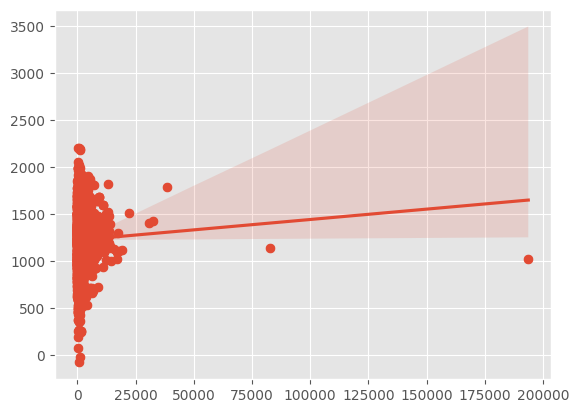

In [56]:
plt.scatter(y_test_2, y_pred_2)
sns.regplot(x=y_test_2, y=y_pred_2, data=df_LinkedIn_clean)
plt.show

#### Logistic Regression

In [57]:
lor = LogisticRegression()
lor.fit(X_train_2, y_train_2)
y_pred_2 = lor.predict(X_test_2)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_2, y_pred_2))
print(mean_squared_error(y_test_2, y_pred_2))
print(median_absolute_error(y_test_2, y_pred_2))

  --- METRICHE ---
1169.687290703237
11202810.052782651
715.0


<function matplotlib.pyplot.show(close=None, block=None)>

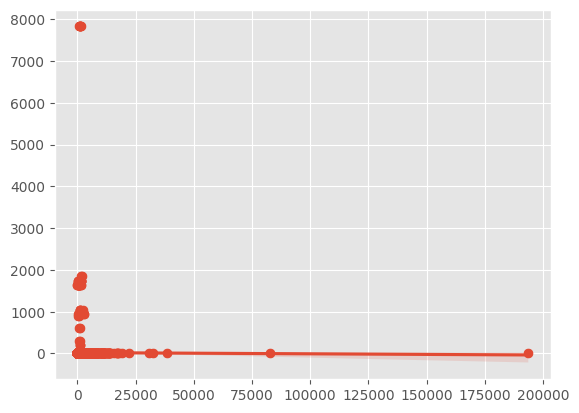

In [58]:
plt.scatter(y_test_2, y_pred_2)
sns.regplot(x=y_test_2, y=y_pred_2, data=df_LinkedIn_clean)
plt.show

#### KNeighbors Regressor

In [59]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 10)
  knn.fit(X_trainval_2, y_trainval_2)
  y_pred_2 = knn.predict(X_test_2)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_2, y_pred_2))
print(mean_squared_error(y_test_2, y_pred_2))
print(median_absolute_error(y_test_2, y_pred_2))

  --- METRICHE ---
599.2180672938925
7763964.843420507
266.79999999999995


<function matplotlib.pyplot.show(close=None, block=None)>

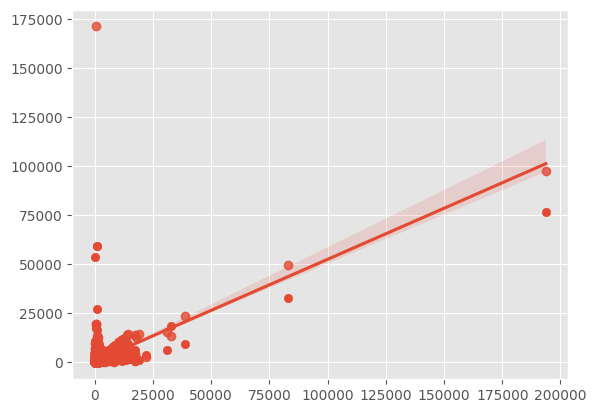

In [60]:
plt.scatter(y_test_1, y_pred_1)
sns.regplot(x=y_test_2, y=y_pred_2, data=df_LinkedIn_clean)
plt.show

In [61]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 5)
  knn.fit(X_trainval_2, y_trainval_2)
  y_pred_2 = knn.predict(X_test_2)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_2, y_pred_2))
print(mean_squared_error(y_test_2, y_pred_2))
print(median_absolute_error(y_test_2, y_pred_2))

  --- METRICHE ---
356.7402966034125
19304079.37340775
72.0


<function matplotlib.pyplot.show(close=None, block=None)>

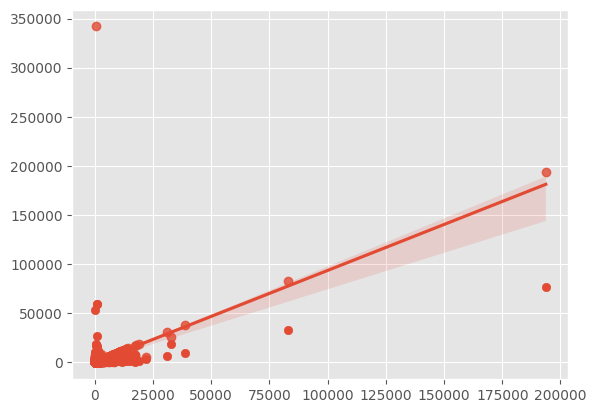

In [62]:
plt.scatter(y_test_1, y_pred_1)
sns.regplot(x=y_test_2, y=y_pred_2, data=df_LinkedIn_clean)
plt.show

In [64]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 1)
  knn.fit(X_trainval_2, y_trainval_2)
  y_pred_2 = knn.predict(X_test_2)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_2, y_pred_2))
print(mean_squared_error(y_test_2, y_pred_2))
print(median_absolute_error(y_test_2, y_pred_2))

  --- METRICHE ---
42.38032211768458
153828.64120554936
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

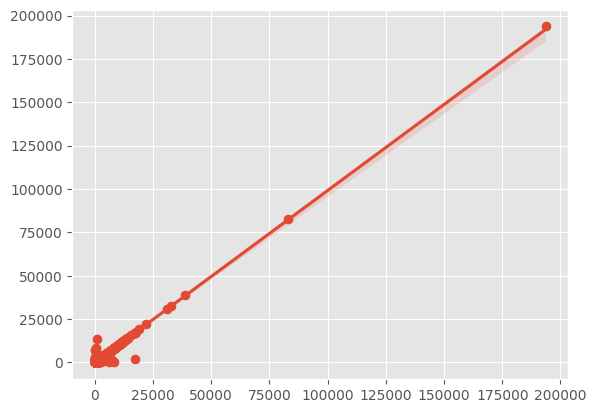

In [65]:
plt.scatter(y_test_2, y_pred_2)
sns.regplot(x=y_test_2, y=y_pred_2, data=df_LinkedIn_clean)
plt.show

#### Decision Tree

In [67]:
for i in range(0,10):
  dt = DecisionTreeRegressor()
  dt.fit(X_trainval_2, y_trainval_2)
  y_pred_2 = dt.predict(X_test_2)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_2, y_pred_2))
print(mean_squared_error(y_test_2, y_pred_2))
print(median_absolute_error(y_test_2, y_pred_2))

  --- METRICHE ---
38.304895550948814
116673.32482857599
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

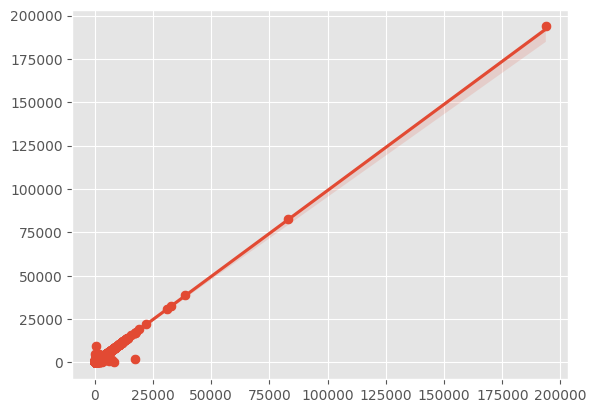

In [68]:
plt.scatter(y_test_2, y_pred_2)
sns.regplot(x=y_test_2, y=y_pred_2, data=df_LinkedIn_clean)
plt.show

#### Random Forest

In [69]:
for i in range(0,10):
  rf = RandomForestRegressor()
  rf.fit(X_trainval_2, y_trainval_2)
  y_pred_2 = rf.predict(X_test_2)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_2, y_pred_2))
print(mean_squared_error(y_test_2, y_pred_2))
print(median_absolute_error(y_test_2, y_pred_2))

  --- METRICHE ---
95.21830011162493
138940.39884621272
10.819999999999993


<function matplotlib.pyplot.show(close=None, block=None)>

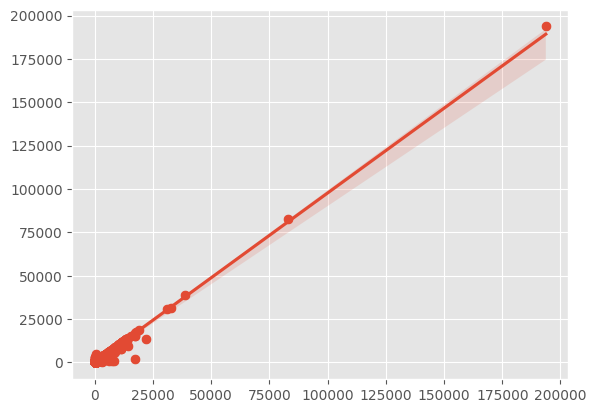

In [70]:
plt.scatter(y_test_2, y_pred_2)
sns.regplot(x=y_test_2, y=y_pred_2, data=df_LinkedIn_clean)
plt.show

### ------------------

### Picture_Data [3rd case]

#### General

The third set of attributes is related to the uploaded profile picture data:

In [71]:
X_3 = df_LinkedIn_profile[['beauty', 'beauty_female','beauty_male', 'blur', 'emo_anger', 'emp_disgust', 'emo_fear', 'emo_neutral', 'emo_surprise', 'gender', 'head_pitch', 'head_roll', 'head_yaw', 'mouth_close', 'mouth_mask', 
                          'mouth_open', 'mouth_other', 'skin_acne', 'skin_dark_circle', 'skin_health', 'skin_stain', 'smile', 'face_quality']].to_numpy()
y_3 = df_LinkedIn_profile['n_followers'].to_numpy()

We normalize the data with the min max scaler function

In [72]:
scaler = MinMaxScaler()
scaler.fit(X_3)
X_3 = scaler.transform(X_3)

In [73]:
X_3

array([[0.52908995, 0.57329561, 0.52908995, ..., 0.01411   , 0.77587795,
        0.71323452],
       [0.52908995, 0.57329561, 0.52908995, ..., 0.01411   , 0.77587795,
        0.71323452],
       [0.52908995, 0.57329561, 0.52908995, ..., 0.01411   , 0.77587795,
        0.71323452],
       ...,
       [0.33682746, 0.46563196, 0.33682746, ..., 0.00995   , 0.95099708,
        0.86315334],
       [0.33682746, 0.46563196, 0.33682746, ..., 0.00995   , 0.95099708,
        0.86315334],
       [0.33682746, 0.46563196, 0.33682746, ..., 0.00995   , 0.95099708,
        0.86315334]])

In [74]:
y_3

array([420, 420, 420, ..., 279, 279, 279])

In [75]:
print('shape of X_3:') 
print(X_3.shape) 
print('type of X_3:') 
print(type(X_3)) 
print('shape of y_3:') 
print(y_3.shape) 
print('type of y_3:') 
print(type(y_3))

shape of X_3:
(62706, 23)
type of X_3:
<class 'numpy.ndarray'>
shape of y_3:
(62706,)
type of y_3:
<class 'numpy.ndarray'>


We test the train_test_split function in order to check if the set created are the same in each iteration:

In [76]:
X_trainval_3, X_test_3, y_trainval_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.1, random_state=0, shuffle=True)
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_trainval_3, y_trainval_3, test_size=0.3, random_state=0, shuffle=True)

In [77]:
print(len(X_train_3))
print(len(X_test_3))
print(len(X_val_3))

39504
6271
16931


In [78]:
X_train_3

array([[0.63638574, 0.59688467, 0.61896014, ..., 0.01151   , 0.9470328 ,
        0.93764364],
       [0.53318294, 0.57196487, 0.53318294, ..., 0.08878   , 0.76868017,
        0.4705349 ],
       [0.44581178, 0.45267478, 0.44581178, ..., 0.04431   , 0.42942378,
        0.85985368],
       ...,
       [0.65344662, 0.57556486, 0.65344662, ..., 0.02782   , 0.98048893,
        0.        ],
       [0.49326615, 0.56067461, 0.49326615, ..., 0.02005   , 0.9553718 ,
        0.86683253],
       [0.68486674, 0.70026195, 0.68486674, ..., 0.24699   , 0.9607376 ,
        0.92976871]])

In [79]:
X_test_3

array([[0.61687987, 0.60789477, 0.61687987, ..., 0.03191   , 0.4885176 ,
        0.        ],
       [0.55855138, 0.60138117, 0.55855138, ..., 0.11466   , 0.00770832,
        0.97139935],
       [0.40516554, 0.51802098, 0.40516554, ..., 0.14691   , 0.9753734 ,
        0.72015012],
       ...,
       [0.62033798, 0.63040524, 0.62033798, ..., 0.29348   , 0.14788972,
        0.94017373],
       [0.79073066, 0.78390228, 0.79073066, ..., 0.02297   , 0.60607456,
        0.58769951],
       [0.69903686, 0.75428988, 0.69903686, ..., 0.14025   , 0.06299804,
        0.88463809]])

In [80]:
X_val_3

array([[0.61113888, 0.55078513, 0.61113888, ..., 0.05851   , 0.0745405 ,
        0.06346328],
       [0.46691162, 0.47022651, 0.46691162, ..., 0.04251   , 0.69453009,
        0.        ],
       [0.55405314, 0.51150738, 0.49615691, ..., 0.05216   , 0.82652264,
        0.98513568],
       ...,
       [0.52205217, 0.50525991, 0.52205217, ..., 0.01958   , 0.41186481,
        0.30317949],
       [0.55617393, 0.54768942, 0.55617393, ..., 0.01115   , 0.69544108,
        0.        ],
       [0.67107485, 0.65828069, 0.67107485, ..., 0.07102   , 0.86816762,
        0.95135887]])

#### Liner Regression

In [81]:
for i in range(0,10):
  lir = LinearRegression()
  lir.fit(X_train_3, y_train_3)
  y_pred_3 = lir.predict(X_test_3)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_3, y_pred_3))
print(mean_squared_error(y_test_3, y_pred_3))
print(median_absolute_error(y_test_3, y_pred_3))

  --- METRICHE ---
937.0201855497633
9832468.579783091
635.8686214536428


<function matplotlib.pyplot.show(close=None, block=None)>

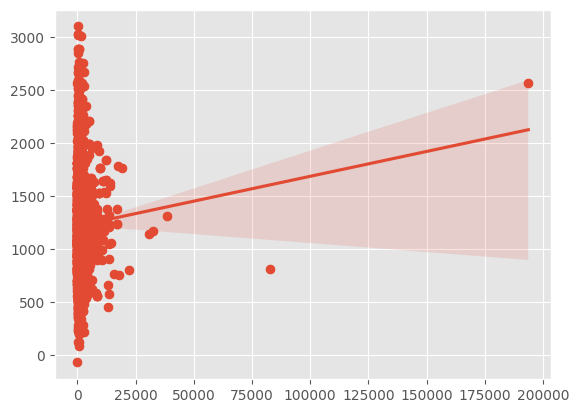

In [82]:
plt.scatter(y_test_3, y_pred_3)
sns.regplot(x=y_test_3, y=y_pred_3, data=df_LinkedIn_clean)
plt.show

#### Logistic Regression

In [83]:
lor = LogisticRegression()
lor.fit(X_train_3, y_train_3)
y_pred_3 = lor.predict(X_test_3)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_3, y_pred_3))
print(mean_squared_error(y_test_3, y_pred_3))
print(median_absolute_error(y_test_3, y_pred_3))

  --- METRICHE ---
1188.2509966512519
11541657.978950726
708.0


<function matplotlib.pyplot.show(close=None, block=None)>

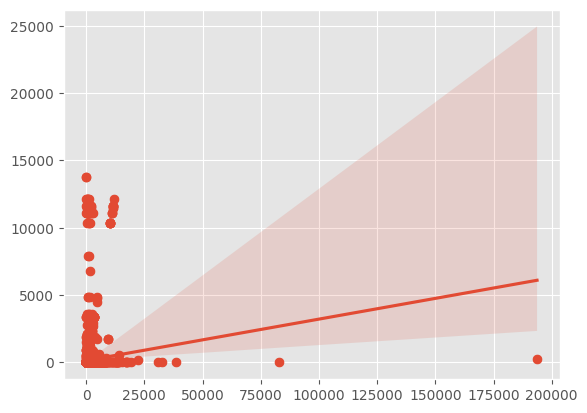

In [84]:
plt.scatter(y_test_3, y_pred_3)
sns.regplot(x=y_test_3, y=y_pred_3, data=df_LinkedIn_clean)
plt.show

#### KNeighbors Regressor

In [85]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 10)
  knn.fit(X_trainval_3, y_trainval_3)
  y_pred_3 = knn.predict(X_test_3)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_3, y_pred_3))
print(mean_squared_error(y_test_3, y_pred_3))
print(median_absolute_error(y_test_3, y_pred_3))

  --- METRICHE ---
658.8188167756339
15256323.242050711
274.79999999999995


<function matplotlib.pyplot.show(close=None, block=None)>

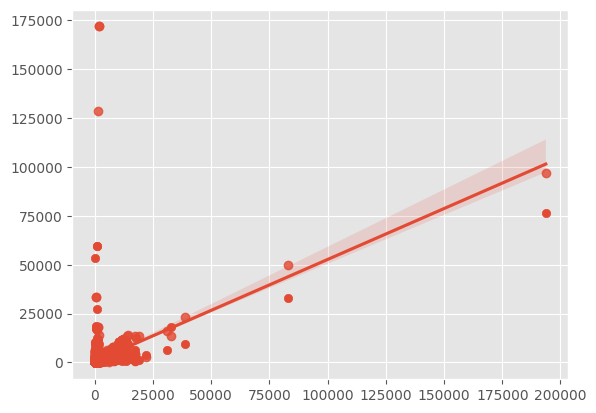

In [86]:
plt.scatter(y_test_1, y_pred_1)
sns.regplot(x=y_test_3, y=y_pred_3, data=df_LinkedIn_clean)
plt.show

In [87]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 5)
  knn.fit(X_trainval_3, y_trainval_3)
  y_pred_3 = knn.predict(X_test_3)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_3, y_pred_3))
print(mean_squared_error(y_test_3, y_pred_3))
print(median_absolute_error(y_test_3, y_pred_3))

  --- METRICHE ---
361.2128528145431
9933962.30613937
69.79999999999995


<function matplotlib.pyplot.show(close=None, block=None)>

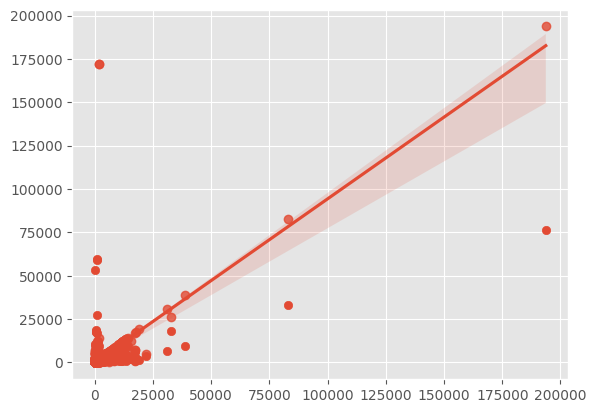

In [88]:
plt.scatter(y_test_1, y_pred_1)
sns.regplot(x=y_test_3, y=y_pred_3, data=df_LinkedIn_clean)
plt.show

In [89]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 1)
  knn.fit(X_trainval_3, y_trainval_3)
  y_pred_3 = knn.predict(X_test_3)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_3, y_pred_3))
print(mean_squared_error(y_test_3, y_pred_3))
print(median_absolute_error(y_test_3, y_pred_3))

  --- METRICHE ---
38.80066974964121
114640.82171902408
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

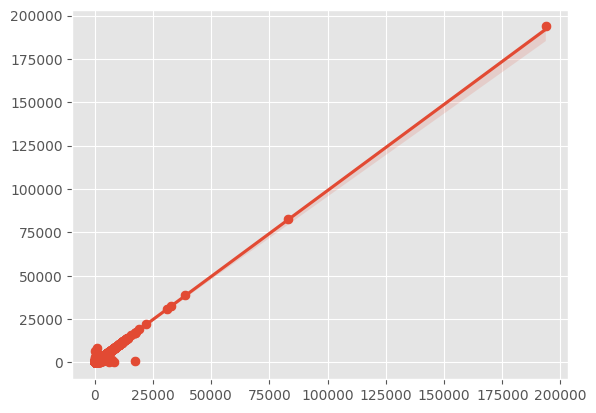

In [90]:
plt.scatter(y_test_3, y_pred_3)
sns.regplot(x=y_test_3, y=y_pred_3, data=df_LinkedIn_clean)
plt.show

#### Decision Tree

In [91]:
for i in range(0,10):
  dt = DecisionTreeRegressor()
  dt.fit(X_trainval_3, y_trainval_3)
  y_pred_3 = dt.predict(X_test_3)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_3, y_pred_3))
print(mean_squared_error(y_test_3, y_pred_3))
print(median_absolute_error(y_test_3, y_pred_3))

  --- METRICHE ---
43.2669430712805
140975.86748524956
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

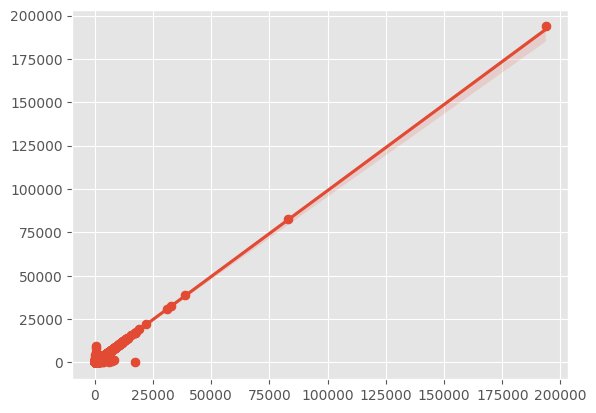

In [92]:
plt.scatter(y_test_3, y_pred_3)
sns.regplot(x=y_test_3, y=y_pred_3, data=df_LinkedIn_clean)
plt.show

#### Random Forest

In [93]:
for i in range(0,10):
  rf = RandomForestRegressor()
  rf.fit(X_trainval_3, y_trainval_3)
  y_pred_3 = rf.predict(X_test_3)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_3, y_pred_3))
print(mean_squared_error(y_test_3, y_pred_3))
print(median_absolute_error(y_test_3, y_pred_3))

  --- METRICHE ---
100.04158029022484
151001.0199054537
11.220000000000027


<function matplotlib.pyplot.show(close=None, block=None)>

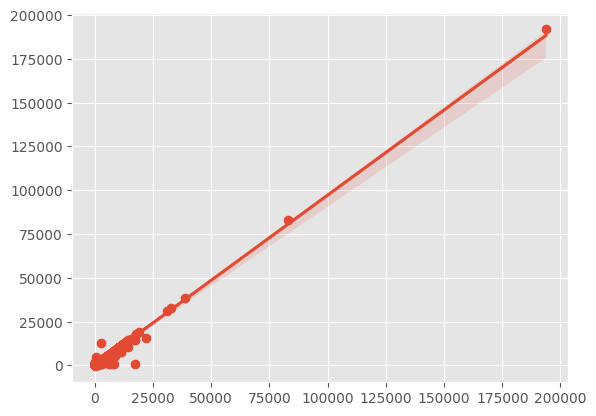

In [94]:
plt.scatter(y_test_3, y_pred_3)
sns.regplot(x=y_test_3, y=y_pred_3, data=df_LinkedIn_clean)
plt.show

### ------------------

### General_Data [4th case]

#### General

Attributes X and y are created, the second is the target attribute while the second is made up of all the other features:

In [95]:
X_4 = df_LinkedIn_profile[['c_id', 'avg_time_in_previous_position', 'avg_current_position_length', 'avg_previous_position_length', 'no_of_promotions', 'no_of_previous_positions', 
                         'current_position_length', 'age', 'beauty', 'beauty_female','beauty_male', 'blur', 'emo_anger', 'emp_disgust', 'emo_fear', 'emo_neutral', 'emo_surprise', 
                         'gender', 'head_pitch', 'head_roll', 'head_yaw', 'mouth_close', 'mouth_mask', 'mouth_open', 'mouth_other', 'skin_acne', 'skin_dark_circle', 'skin_health', 
                         'skin_stain', 'smile', 'african', 'celtic_english', 'east_asian', 'european', 'greek', 'hispanic', 'jewish', 'muslim', 'nordic', 'south_asian', 'face_quality']].to_numpy()
y_4 = df_LinkedIn_profile['n_followers'].to_numpy()

We normalize the data with the min max scaler function

In [96]:
scaler = MinMaxScaler()
scaler.fit(X_4)
X_4 = scaler.transform(X_4)

In [97]:
X_4

array([[0.00000000e+00, 7.14285714e-02, 2.62225050e-02, ...,
        0.00000000e+00, 0.00000000e+00, 7.13234519e-01],
       [1.59476916e-05, 3.57142857e-02, 1.50881658e-02, ...,
        0.00000000e+00, 0.00000000e+00, 7.13234519e-01],
       [3.18953831e-05, 2.38095238e-02, 1.64970005e-02, ...,
        0.00000000e+00, 0.00000000e+00, 7.13234519e-01],
       ...,
       [9.99968105e-01, 0.00000000e+00, 1.10434466e-02, ...,
        0.00000000e+00, 0.00000000e+00, 8.63153345e-01],
       [9.99984052e-01, 0.00000000e+00, 1.03662970e-01, ...,
        0.00000000e+00, 0.00000000e+00, 8.63153345e-01],
       [1.00000000e+00, 0.00000000e+00, 3.32212325e-02, ...,
        0.00000000e+00, 0.00000000e+00, 8.63153345e-01]])

In [98]:
y_4

array([420, 420, 420, ..., 279, 279, 279])

In [99]:
print('shape of X_4:') 
print(X_4.shape) 
print('type of X_4:') 
print(type(X_4)) 
print('shape of y_4:') 
print(y_4.shape) 
print('type of y_4:') 
print(type(y_4))

shape of X_4:
(62706, 41)
type of X_4:
<class 'numpy.ndarray'>
shape of y_4:
(62706,)
type of y_4:
<class 'numpy.ndarray'>


We test the train_test_split function in order to check if the set created are the same in each iteration:

In [100]:
X_trainval_4, X_test_4, y_trainval_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.1, random_state=0, shuffle=True)
X_train_4, X_val_4, y_train_4, y_val_4 = train_test_split(X_trainval_4, y_trainval_4, test_size=0.3, random_state=0, shuffle=True)

In [101]:
print(len(X_train_4))
print(len(X_test_4))
print(len(X_val_4))

39504
6271
16931


In [102]:
X_train_4

array([[0.64399968, 0.01428571, 0.00822578, ..., 0.        , 0.04160416,
        0.93764364],
       [0.09327805, 0.        , 0.06080713, ..., 0.        , 0.        ,
        0.4705349 ],
       [0.01840364, 0.        , 0.07044174, ..., 0.        , 0.        ,
        0.85985368],
       ...,
       [0.55056216, 0.        , 0.07044174, ..., 0.        , 0.        ,
        0.        ],
       [0.75006778, 0.        , 0.04331031, ..., 0.        , 0.        ,
        0.86683253],
       [0.89275177, 0.07142857, 0.03722051, ..., 0.        , 0.        ,
        0.92976871]])

In [103]:
X_test_4

array([[0.82754166, 0.03571429, 0.23513907, ..., 0.        , 0.        ,
        0.        ],
       [0.84385615, 0.        , 0.03632673, ..., 0.        , 0.98629863,
        0.97139935],
       [0.90453712, 0.        , 0.11338847, ..., 0.        , 0.        ,
        0.72015012],
       ...,
       [0.05819313, 0.        , 0.00686239, ..., 0.        , 0.        ,
        0.94017373],
       [0.6687186 , 0.        , 0.08155335, ..., 0.        , 0.01370137,
        0.58769951],
       [0.50474444, 0.01785714, 0.02758589, ..., 0.        , 0.        ,
        0.88463809]])

In [104]:
X_val_4

array([[0.74558648, 0.03571429, 0.02613161, ..., 0.        , 0.99949995,
        0.06346328],
       [0.50007176, 0.        , 0.05385384, ..., 0.        , 0.99389939,
        0.        ],
       [0.19649151, 0.        , 0.08843847, ..., 0.        , 0.03830383,
        0.98513568],
       ...,
       [0.94394386, 0.        , 0.01508817, ..., 0.        , 0.        ,
        0.30317949],
       [0.74911092, 0.07142857, 0.027495  , ..., 0.        , 0.        ,
        0.        ],
       [0.01811658, 0.        , 0.0373114 , ..., 0.        , 0.        ,
        0.95135887]])

#### Liner Regression

In [105]:
for i in range(0,10):
  lir = LinearRegression()
  lir.fit(X_train_4, y_train_4)
  y_pred_4 = lir.predict(X_test_4)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_4, y_pred_4))
print(mean_squared_error(y_test_4, y_pred_4))
print(median_absolute_error(y_test_4, y_pred_4))

  --- METRICHE ---
946.3475252238491
9786537.191111144
623.5835855714977


<function matplotlib.pyplot.show(close=None, block=None)>

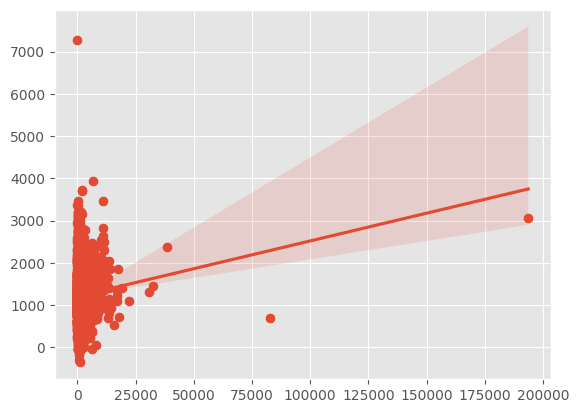

In [106]:
plt.scatter(y_test_4, y_pred_4)
sns.regplot(x=y_test_4, y=y_pred_4, data=df_LinkedIn_clean)
plt.show

#### Logistic Regression

In [107]:
lor = LogisticRegression()
lor.fit(X_train_4, y_train_4)
y_pred_4 = lor.predict(X_test_4)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_4, y_pred_4))
print(mean_squared_error(y_test_4, y_pred_4))
print(median_absolute_error(y_test_4, y_pred_4))

  --- METRICHE ---
1118.5389889969701
11131661.091691915
674.0


<function matplotlib.pyplot.show(close=None, block=None)>

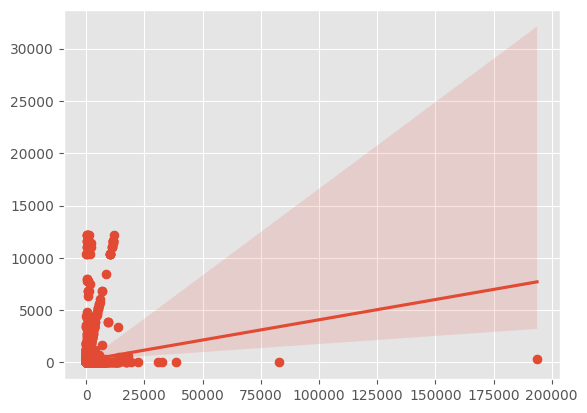

In [108]:
plt.scatter(y_test_4, y_pred_4)
sns.regplot(x=y_test_4, y=y_pred_4, data=df_LinkedIn_clean)
plt.show

#### KNeighbors Regressor

In [109]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 10)
  knn.fit(X_trainval_4, y_trainval_4)
  y_pred_4 = knn.predict(X_test_4)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_4, y_pred_4))
print(mean_squared_error(y_test_4, y_pred_4))
print(median_absolute_error(y_test_4, y_pred_4))

  --- METRICHE ---
717.0657311433582
28618093.221001428
271.20000000000005


<function matplotlib.pyplot.show(close=None, block=None)>

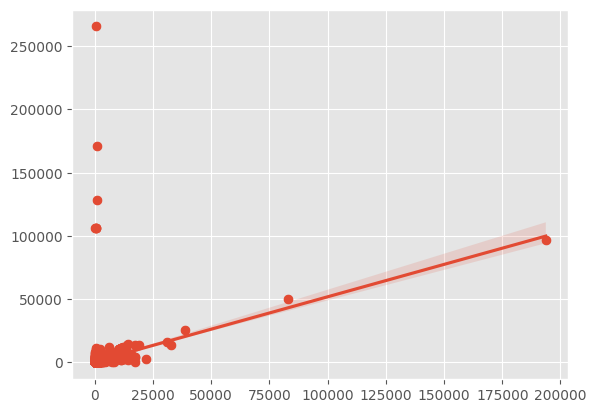

In [110]:
plt.scatter(y_test_4, y_pred_4)
sns.regplot(x=y_test_4, y=y_pred_4, data=df_LinkedIn_clean)
plt.show

In [111]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 5)
  knn.fit(X_trainval_4, y_trainval_4)
  y_pred_4 = knn.predict(X_test_4)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_4, y_pred_4))
print(mean_squared_error(y_test_4, y_pred_4))
print(median_absolute_error(y_test_4, y_pred_4))

  --- METRICHE ---
321.30747887099346
2451832.0220060595
77.60000000000002


<function matplotlib.pyplot.show(close=None, block=None)>

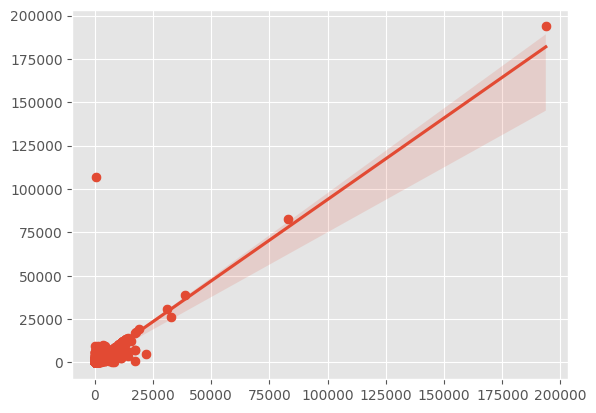

In [112]:
plt.scatter(y_test_4, y_pred_4)
sns.regplot(x=y_test_4, y=y_pred_4, data=df_LinkedIn_clean)
plt.show

In [113]:
for i in range(0,10):
  knn = KNeighborsRegressor(n_neighbors = 1)
  knn.fit(X_trainval_4, y_trainval_4)
  y_pred_4 = knn.predict(X_test_4)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_4, y_pred_4))
print(mean_squared_error(y_test_4, y_pred_4))
print(median_absolute_error(y_test_4, y_pred_4))

  --- METRICHE ---
46.40041460692075
131633.28735448892
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

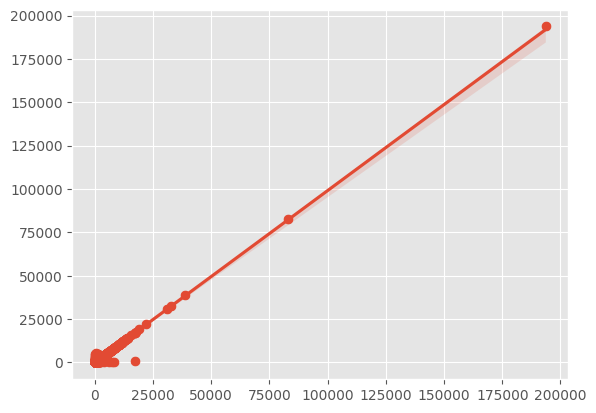

In [114]:
plt.scatter(y_test_4, y_pred_4)
sns.regplot(x=y_test_4, y=y_pred_4, data=df_LinkedIn_clean)
plt.show

#### Decision Tree

In [115]:
for i in range(0,10):
  dt = DecisionTreeRegressor()
  dt.fit(X_trainval_4, y_trainval_4)
  y_pred_4 = dt.predict(X_test_4)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_4, y_pred_4))
print(mean_squared_error(y_test_4, y_pred_4))
print(median_absolute_error(y_test_4, y_pred_4))

  --- METRICHE ---
280.13251475043853
1361570.1455908148
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

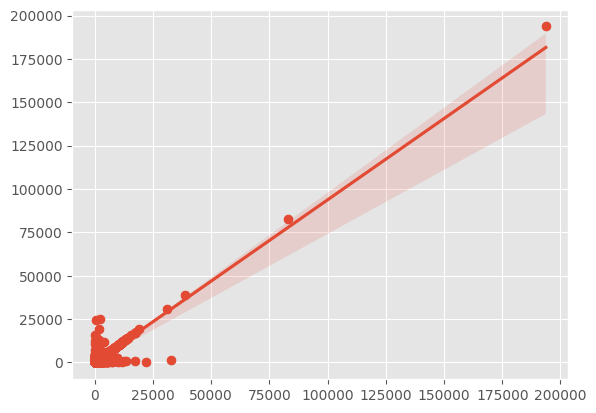

In [116]:
plt.scatter(y_test_4, y_pred_4)
sns.regplot(x=y_test_4, y=y_pred_4, data=df_LinkedIn_clean)
plt.show

#### Random Forest

In [117]:
for i in range(0,10):
  rf = RandomForestRegressor()
  rf.fit(X_trainval_4, y_trainval_4)
  y_pred_4 = rf.predict(X_test_4)

print('  --- METRICHE ---')
print(mean_absolute_error(y_test_4, y_pred_4))
print(mean_squared_error(y_test_4, y_pred_4))
print(median_absolute_error(y_test_4, y_pred_4))

  --- METRICHE ---
317.6874677084994
576096.4991705151
163.5


<function matplotlib.pyplot.show(close=None, block=None)>

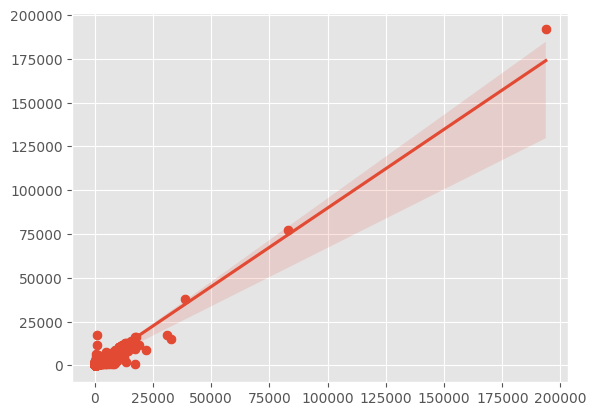

In [118]:
plt.scatter(y_test_4, y_pred_4)
sns.regplot(x=y_test_4, y=y_pred_4, data=df_LinkedIn_clean)
plt.show